##### Análise de Dados - Doença Cardíaca

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/caioc/Documents/ProjetosData/Coracao/data/heart_translated.csv")
df_num = pd.read_csv("C:/Users/caioc/Documents/ProjetosData/Coracao/data/heart_encoded.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        746 non-null    int64  
 1   Sexo                         746 non-null    object 
 2   TipoDorPeito                 746 non-null    object 
 3   PressaoArterialRepouso       746 non-null    int64  
 4   Colesterol                   746 non-null    int64  
 5   GlicoseJejum                 746 non-null    object 
 6   EletrocardiogramaRepouso     746 non-null    object 
 7   FreqCardiacaMaxima           746 non-null    int64  
 8   AnginaExercicio              746 non-null    object 
 9   DepressaoSTExercicioRepouso  746 non-null    float64
 10  InclinacaoST                 746 non-null    object 
 11  DoencaCardiaca               746 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 70.1+ KB


In [4]:
df.shape

(746, 12)

In [5]:
pd.DataFrame(df.isnull().sum()).T.style.background_gradient(cmap='coolwarm')

,Idade,Sexo,TipoDorPeito,PressaoArterialRepouso,Colesterol,GlicoseJejum,EletrocardiogramaRepouso,FreqCardiacaMaxima,AnginaExercicio,DepressaoSTExercicioRepouso,InclinacaoST,DoencaCardiaca
0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.describe(percentiles=[0, .25, .50, .75]).T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,0%,25%,50%,75%,max
Idade,746.000000,52.882038,9.505888,28.000000,28.000000,46.000000,54.000000,59.000000,77.000000
PressaoArterialRepouso,746.000000,133.022788,17.282750,92.000000,92.000000,120.000000,130.000000,140.000000,200.000000
Colesterol,746.000000,244.635389,59.153524,85.000000,85.000000,207.250000,237.000000,275.000000,603.000000
FreqCardiacaMaxima,746.000000,140.226542,24.524107,69.000000,69.000000,122.000000,140.000000,160.000000,202.000000
DepressaoSTExercicioRepouso,746.000000,0.901609,1.072861,-0.100000,-0.100000,0.000000,0.500000,1.500000,6.200000
DoencaCardiaca,746.000000,0.477212,0.499816,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
colunas_cat = df.select_dtypes(include=['object']).columns.to_list()
for col in df[colunas_cat]:
    print(f"\nColuna: {col}\n{df[col].value_counts()}")


Coluna: Sexo
Sexo
M    564
F    182
Name: count, dtype: int64

Coluna: TipoDorPeito
TipoDorPeito
Assintomatico    370
ANA              169
AT               166
AAT               41
Name: count, dtype: int64

Coluna: GlicoseJejum
GlicoseJejum
Normal    621
Alto      125
Name: count, dtype: int64

Coluna: EletrocardiogramaRepouso
EletrocardiogramaRepouso
Normal    445
HVE       176
ASST      125
Name: count, dtype: int64

Coluna: AnginaExercicio
AnginaExercicio
Ausente     459
Presente    287
Name: count, dtype: int64

Coluna: InclinacaoST
InclinacaoST
Plano          354
Ascendente     349
Descendente     43
Name: count, dtype: int64


##### Correlações

In [25]:
plt.style.use('dark_background')

In [9]:
sns.set_style('darkgrid')

In [10]:
corr_matrix = df_num.corr()

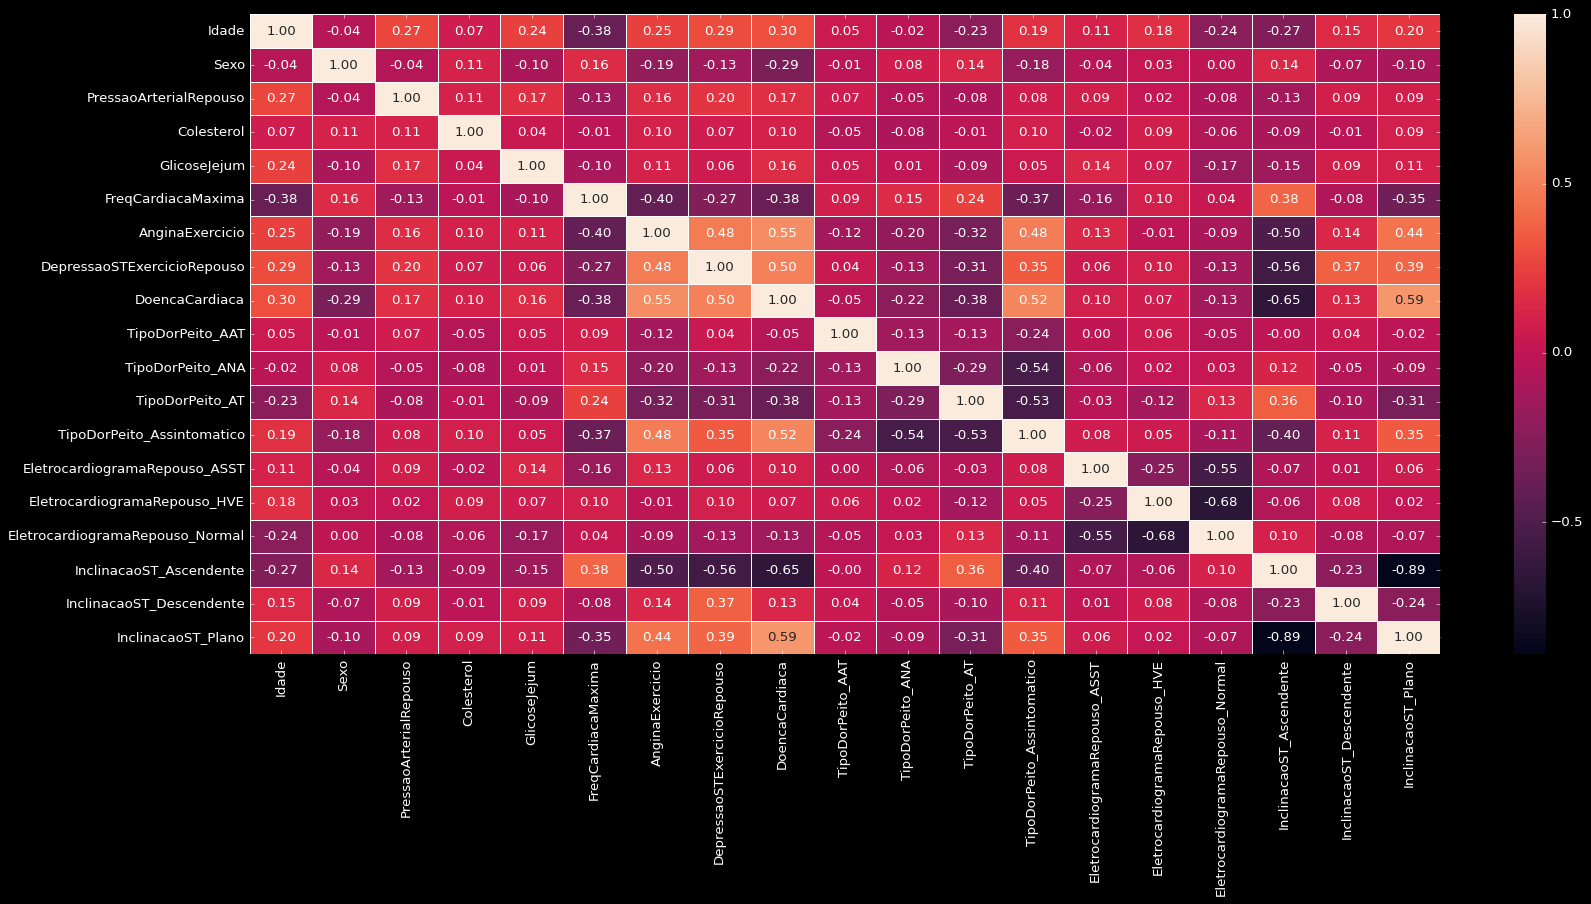

In [26]:
plt.figure(figsize=(24, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, fmt='.2f')
plt.show()

In [12]:
corr = df_num.corrwith(df_num['DoencaCardiaca']).sort_values(ascending=False).to_frame()

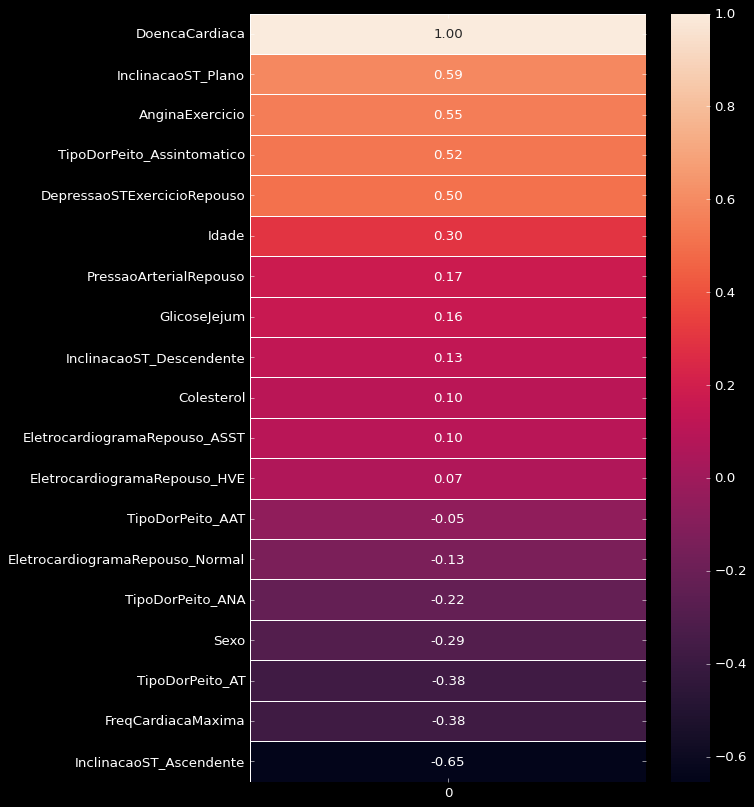

In [27]:
plt.figure(figsize=(8, 12))
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.2f')
plt.show()

##### Insights

In [14]:
df_com = df[df['DoencaCardiaca'] == 1]
df_sem = df[df['DoencaCardiaca'] == 0]

In [15]:
df[df['DoencaCardiaca'] == 1].describe(percentiles=[0, .25, .50, .75]).T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,0%,25%,50%,75%,max
Idade,356.000000,55.851124,8.820768,31.000000,31.000000,50.000000,57.000000,62.000000,77.000000
PressaoArterialRepouso,356.000000,136.154494,17.963226,92.000000,92.000000,123.750000,136.000000,145.000000,200.000000
Colesterol,356.000000,251.061798,62.462713,100.000000,100.000000,212.000000,246.000000,283.250000,603.000000
FreqCardiacaMaxima,356.000000,130.550562,22.299377,71.000000,71.000000,115.000000,130.000000,147.000000,195.000000
DepressaoSTExercicioRepouso,356.000000,1.457865,1.148383,0.000000,0.000000,0.500000,1.500000,2.000000,6.200000
DoencaCardiaca,356.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df[df['DoencaCardiaca'] == 0].describe(percentiles=[0, .25, .50, .75]).T.style.background_gradient(cmap='coolwarm')

,count,mean,std,min,0%,25%,50%,75%,max
Idade,390.000000,50.171795,9.307029,28.000000,28.000000,43.000000,51.000000,56.000000,76.000000
PressaoArterialRepouso,390.000000,130.164103,16.137065,94.000000,94.000000,120.000000,130.000000,140.000000,190.000000
Colesterol,390.000000,238.769231,55.394617,85.000000,85.000000,203.000000,231.500000,269.000000,564.000000
FreqCardiacaMaxima,390.000000,149.058974,23.111646,69.000000,69.000000,135.000000,150.500000,167.000000,202.000000
DepressaoSTExercicioRepouso,390.000000,0.393846,0.677674,-0.100000,-0.100000,0.000000,0.000000,0.600000,4.200000
DoencaCardiaca,390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
cat_col = df.select_dtypes(include=['object']).columns.to_list()
num_col = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [18]:
def descricao_categorica(df1, df2, coluna):
    cont_com = df1[coluna].value_counts()
    cont_sem = df2[coluna].value_counts()

    print(f"\nDistribuição de {coluna} para pacientes COM doença cardíaca: {cont_com}")
    print(f"\nDistribuição de {coluna} para pacientes SEM doença cardíaca: {cont_sem}")
    print(f"\n{'-=' * 55}")

In [19]:
for coluna in cat_col:
    descricao_categorica(df_com, df_sem, coluna)


Distribuição de Sexo para pacientes COM doença cardíaca: Sexo
M    316
F     40
Name: count, dtype: int64

Distribuição de Sexo para pacientes SEM doença cardíaca: Sexo
M    248
F    142
Name: count, dtype: int64

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Distribuição de TipoDorPeito para pacientes COM doença cardíaca: TipoDorPeito
Assintomatico    274
ANA               46
AT                21
AAT               15
Name: count, dtype: int64

Distribuição de TipoDorPeito para pacientes SEM doença cardíaca: TipoDorPeito
AT               145
ANA              123
Assintomatico     96
AAT               26
Name: count, dtype: int64

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Distribuição de GlicoseJejum para pacientes COM doença cardíaca: GlicoseJejum
Normal    274
Alto       82
Name: count, dtype: int64

Distribuição de GlicoseJejum para pacientes SEM do

In [29]:
plt.style.use('classic')

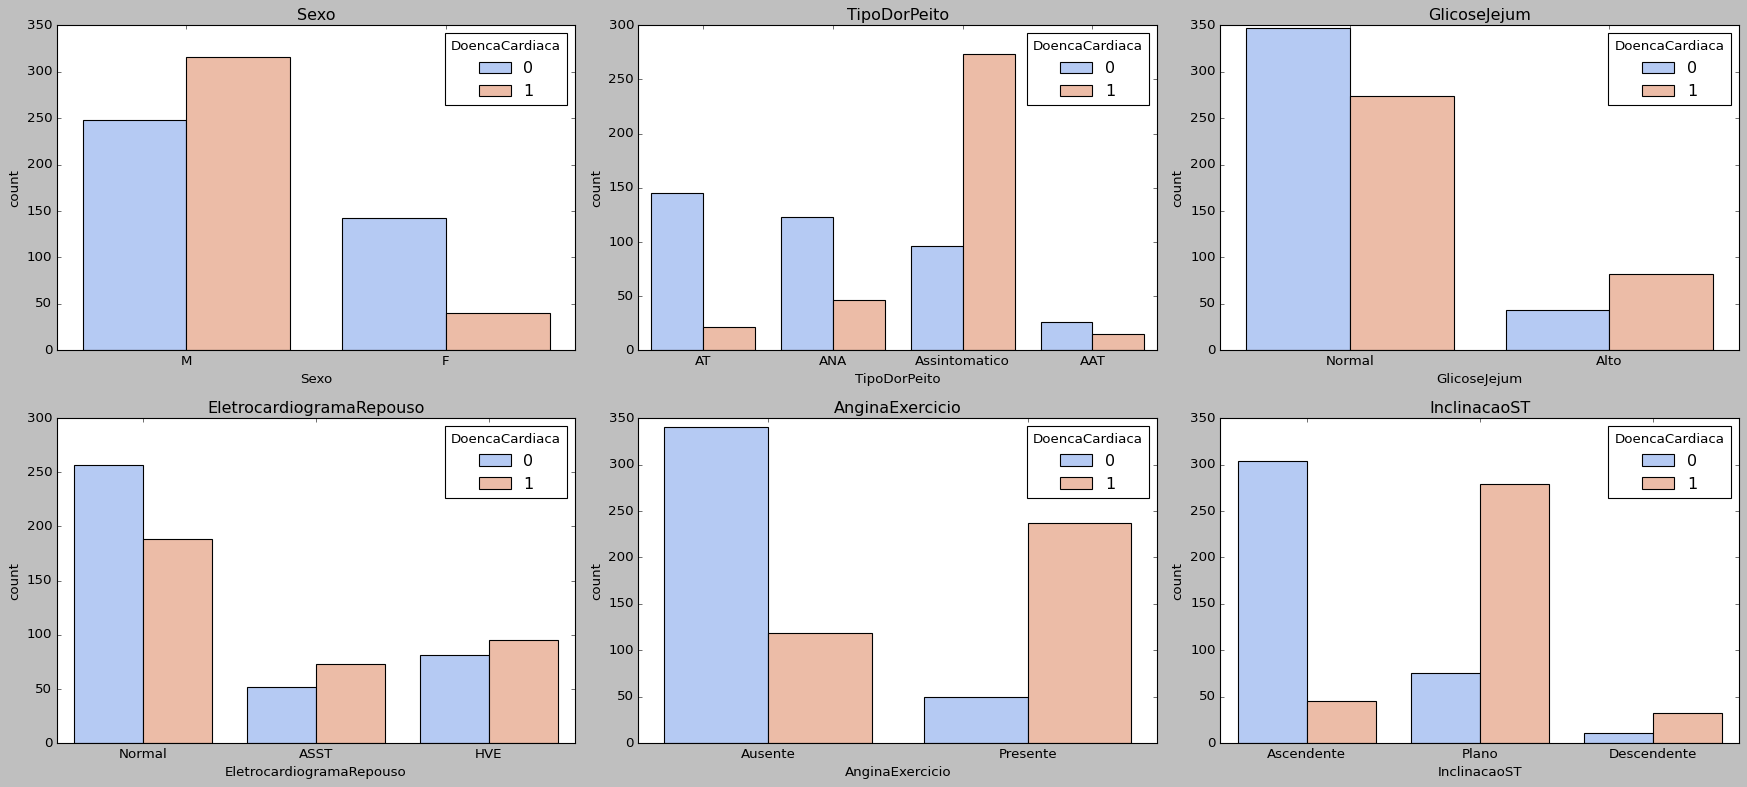

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 10))
for ax, coluna in zip(axes.flatten(), cat_col):
    sns.countplot(data=df, x=coluna, hue='DoencaCardiaca', ax=ax, palette='coolwarm')
    ax.set_title(coluna)

plt.tight_layout()
plt.show()

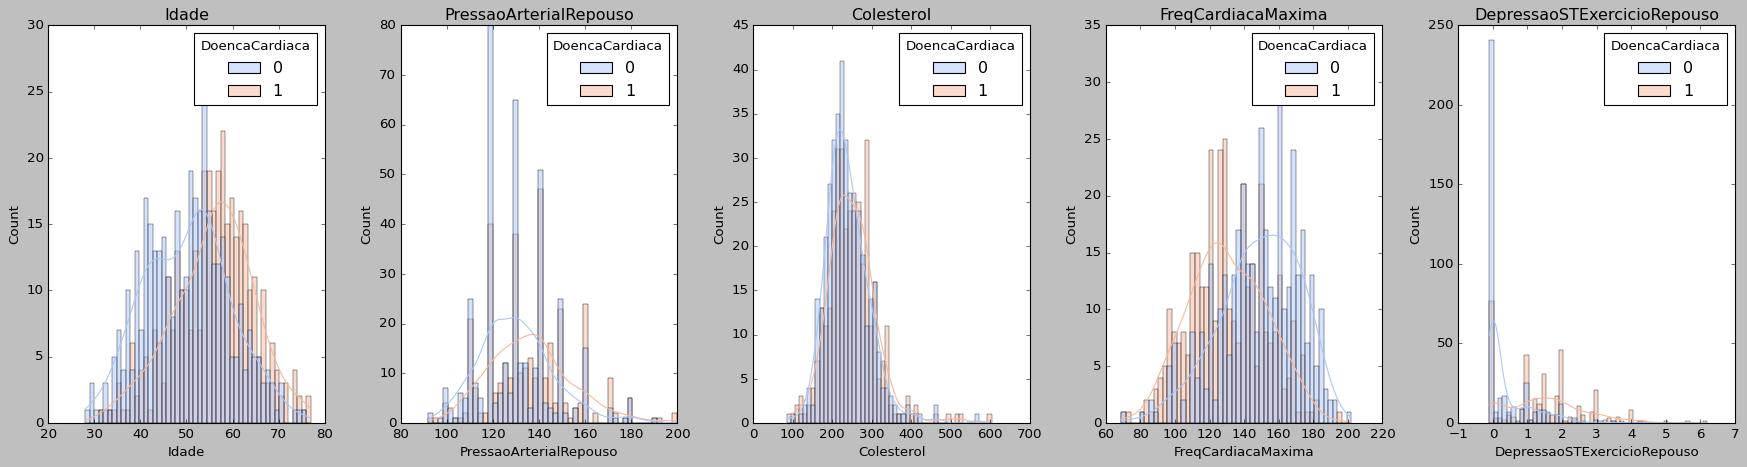

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(22, 6))

for ax, coluna in zip(axes, num_col):
    sns.histplot(df, x=coluna, hue='DoencaCardiaca',  bins=50, kde=True, ax=ax, palette='coolwarm')
    ax.set_title(coluna)

plt.tight_layout()
plt.show()

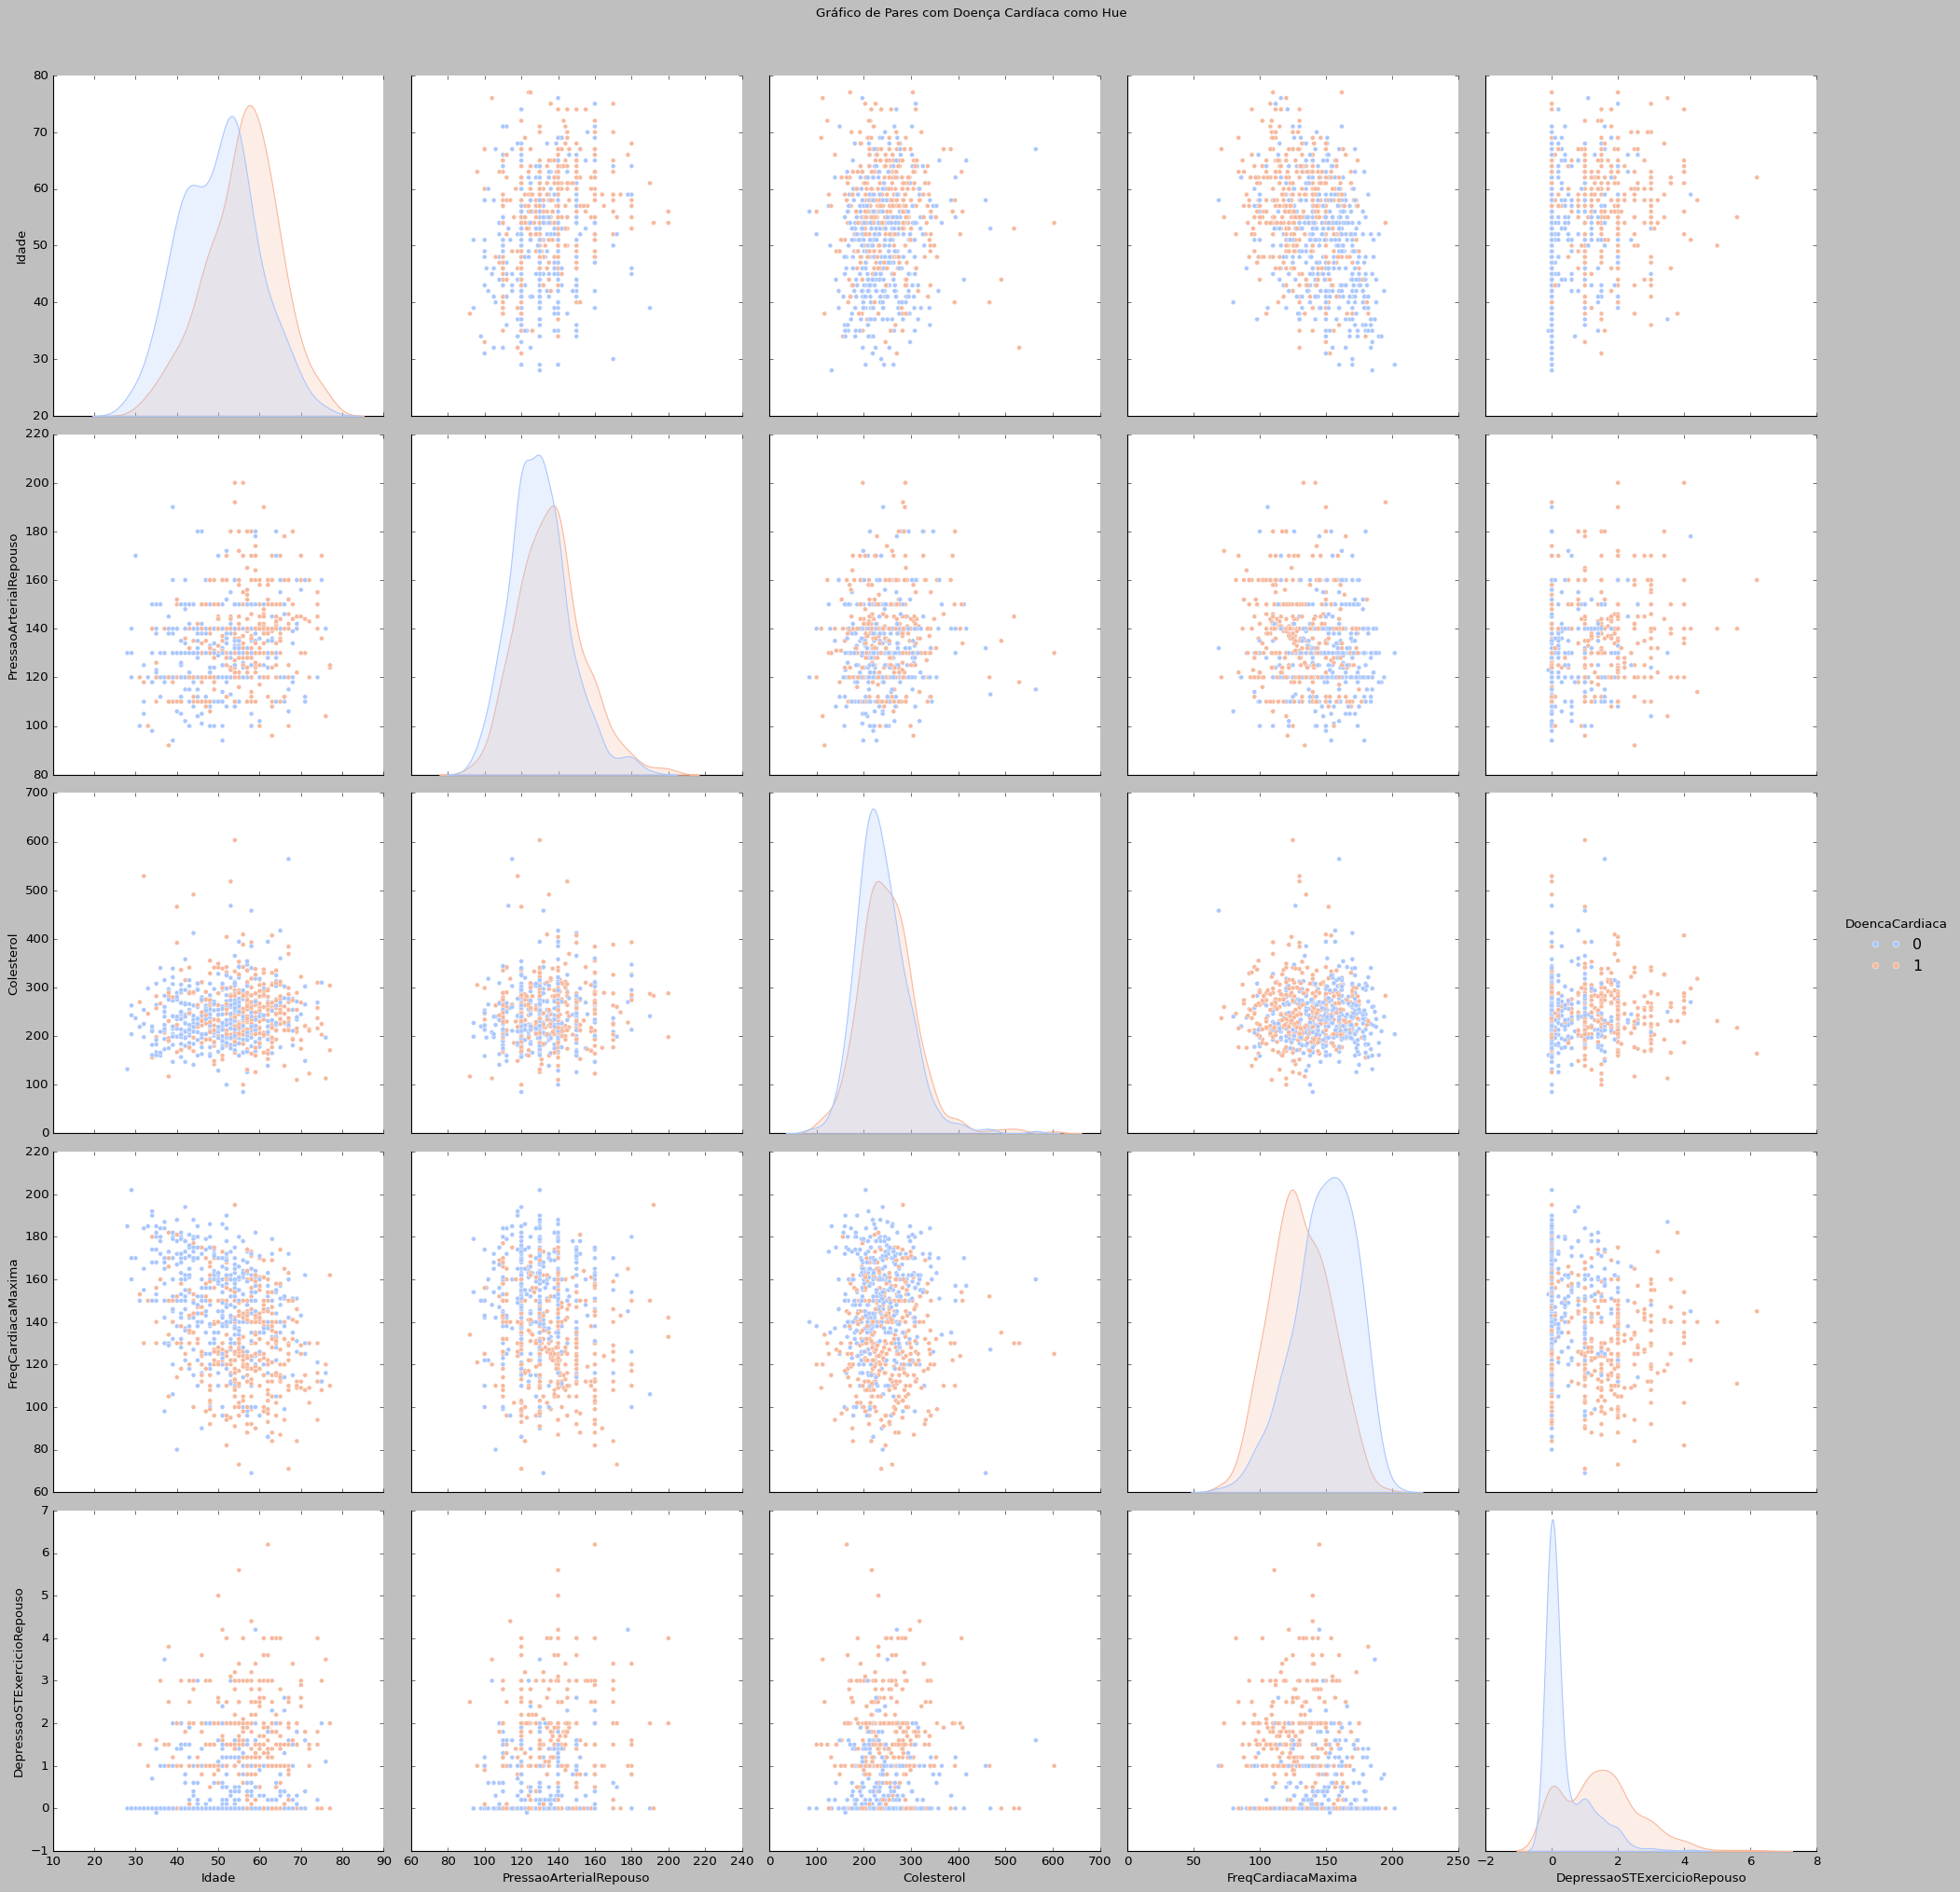

In [30]:
g = sns.pairplot(df, hue='DoencaCardiaca', height=5, palette='coolwarm')
plt.suptitle('Gráfico de Pares com Doença Cardíaca como Hue', y=1.02)
plt.show()